# I. Import Libraries and Data

Questions for Dr. Sánchez Becerra
1. Should I clean all fields of the data or just the ones I am going to use? For example, if I'm not planning on using the milliseconds field in the results table, do I still need to convert it to the correct data type? What about missing values?
2. How thorough do my checks for data cleaning and validation need to be? For example, in the races table, can I assume that the values in the year column match the year specified in the date column?
    Should I have checks for every new table I create?

5. Should I check for outliers before or after the data is filtered and aggregated? For example, if I am using the points field in the results table but aggregating it across constructors and only for specific years, should I look at the point outliers of my new table or the original results table or both?

7. Structure of code
8. What was it that we should comment out vs. what we should show in our submission?



Make code more concise 
- Get rid of cleaning variables that I am not using 
- Don't need to print dtypes or .describe()
- Make use of lists/dictionaries instead of printing loads
- Add a title
- Add 3 bullet points of top findings 
- Make code more readable (e.g., dont just print out empty dataframe)
- Don't need to check for duplicates for all - could just say "no duplicates found" 
- Dont break out by table, break out by check 
- Format results tables 


Questions: 
- Needed data
- Steps 
- Table
- Visualization
- Findings 

### Key Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os 

### Read Datasets

To answer questions a-e, I know that I need the following fields from the following tables:
results:
raceId, driverId, constructorId, number, positionOrder, points, fastestLapTime, rank
races: raceId, year, 
constructors: 

In [2]:
import os 
base_dir = os.getcwd()
#"/Users/gracebarringer/qtm530fall2024/Lecture 03/data_raw" # 

import os 
base_dir = os.getcwd()
file_path = os.path.normpath(os.path.join(base_dir, "../../", "Lecture 03/data_raw/"))


results_file_path = os.path.join(file_path, "results.csv")
races_file_path = os.path.join(file_path, "races.csv")
constructors_file_path = os.path.join(file_path, "constructors.csv")
drivers_file_path = os.path.join(file_path, "drivers.csv")


results = pd.read_csv(results_file_path)
races = pd.read_csv(races_file_path)
constructors = pd.read_csv(constructors_file_path)
drivers = pd.read_csv(drivers_file_path)



# II. Cleaning Data 

In [3]:
# Lists of fields I will be using from each data source
results_cols = ['resultId', 'raceId', 'driverId', 'constructorId', 'positionOrder', 'points', 'fastestLapTime', 'fastestLapSpeed']
races_cols = ['raceId', 'year']
constructors_cols = ['constructorId', 'name']
drivers_cols = ['driverId', 'forename', 'surname']

For each table I will be using for the analysis, I want to conduct a few basic checks: \
&emsp;&emsp;1.\) Check for correct data types \
&emsp;&emsp;2.\) Check for duplicates \
&emsp;&emsp;3.\) Check for missing values \
&emsp;&emsp;4.\) Check for join integrity

##### 1.\) Checking for correct data types

In [4]:
# Checking to ensure the data types match what's expected 
# Only for fields I will be using 
display(results[results_cols].dtypes)
display(races[races_cols].dtypes)
display(constructors[constructors_cols].dtypes)
display(drivers[drivers_cols].dtypes)

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
positionOrder        int64
points             float64
fastestLapTime      object
fastestLapSpeed     object
dtype: object

raceId    int64
year      int64
dtype: object

constructorId     int64
name             object
dtype: object

driverId     int64
forename    object
surname     object
dtype: object

***Findings***
- For each table, all used fields match the data types in the F1 codebook 
- fastestLapTime and fastestLapSpeed in the results table are objects. I want to look at them when determining Ferrari's best year so I am going to covert them into integers 

In [5]:
# # convert \\N to nan
results["fastestLapTime"] = results["fastestLapTime"].replace('\\N', np.nan)
# # split time 
# time_split = results['fastestLapTime_test'].str.split(':', expand=True)
# print(time_split)
# # results['test'] = pd.to_datetime(results['fastestLapTime_test'])
# # display(results)

results["fastestLapSpeed"] = results["fastestLapSpeed"].replace('\\N', np.nan)



##### 2.\) Checking for duplicates 

In [6]:
# Checking for duplicate records in results table - every record should be unique
results_duplicates = results[results.duplicated()]

# Checking for unique raceId in the races table - each record should represent a unique raceId 
# It is important for raceId to be unique because I will be using it to join year to the results table 
raceId_duplicates = races[races['raceId'].duplicated()]

# Checking for unique constructorId in constructors table - each record should represent a unique constructorId
# It is important for constructorId to be unique because I will be using it to join constructor name to the results table 
contructorId_duplicates = constructors[constructors['constructorId'].duplicated()]

# Checking for unique name in constructors table - ensuring name formatting is consistent 
# To ensure no duplicate names, I need to normalize the name values to ensure that duplicate names are recognized if they exist
constructors['normalizedName'] = constructors['name'].str.lower().str.strip()
constructorName_duplicates = constructors[constructors['normalizedName'].duplicated()]


# Checking for unique driverId in the drivers table - each record should represent a unique driverId
# It is important for driverId to be unique because I will be using it to join driver name to the results table 
driverId_duplicates = drivers[drivers['driverId'].duplicated()]

# Checking for unique driver names in drivers table - ensuring name formatting is consistent 
# To ensure no duplicate driver names, I need combine forename and surname then 
# normalize the values to ensure that duplicate names are recognized if they exist
drivers['fullName'] = drivers['forename'] + " " + drivers['surname']
drivers['normalizedfullName'] = drivers['fullName'].str.lower().str.strip()
driverName_duplicates = drivers[drivers['normalizedfullName'].duplicated()]

duplicate_dict = {'Table Name': ['results', 'races', 'constructors', 'constructors', 'drivers', 'drivers'],
                  'Duplicate Check': ['All Records', 'Race ID', 'Constructor ID', 'Constructor Name', 'Driver ID', 'Driver Full Name'],
                  'Duplicate Count': [len(results_duplicates), len(raceId_duplicates), len(contructorId_duplicates), len(constructorName_duplicates), len(driverId_duplicates), len(driverName_duplicates)]
}

duplicates = pd.DataFrame(duplicate_dict)

display(duplicates)


,Table Name,Duplicate Check,Duplicate Count
0,results,All Records,0
1,races,Race ID,0
2,constructors,Constructor ID,0
3,constructors,Constructor Name,0
4,drivers,Driver ID,0
5,drivers,Driver Full Name,0


There are no duplicates in the unique IDs and records I will be using

##### 3.\) Checking for missing values

In [7]:
results_missing_count = results[results_cols].isna().sum()
results_missing_share = ((results[results_cols].isna().sum()/results.shape[0])*100).round(0).astype(int)
results_missing_table = pd.DataFrame({
    'Missing Count': results_missing_count,
    'Missing Share (%)': results_missing_share
})

races_missing_count = races[races_cols].isna().sum()
races_missing_share = ((races[races_cols].isna().sum()/races.shape[0])*100).round(0).astype(int)
races_missing_table = pd.DataFrame({
    'Missing Count': races_missing_count,
    'Missing Share (%)': races_missing_share
})

constructors_missing_count = constructors[constructors_cols].isna().sum()
constructors_missing_share = ((constructors[constructors_cols].isna().sum()/constructors.shape[0])*100).round(0).astype(int)
constructors_missing_table = pd.DataFrame({
    'Missing Count': constructors_missing_count,
    'Missing Share (%)': constructors_missing_share
})

drivers_missing_count = drivers[drivers_cols].isna().sum()
drivers_missing_share = ((drivers[drivers_cols].isna().sum()/drivers.shape[0])*100).round(0).astype(int)
drivers_missing_table = pd.DataFrame({
    'Missing Count': drivers_missing_count,
    'Missing Share (%)': drivers_missing_share
})


display(results_missing_table)
display(races_missing_table)
display(constructors_missing_table)
display(drivers_missing_table)


,Missing Count,Missing Share (%)
resultId,0,0
raceId,0,0
driverId,0,0
constructorId,0,0
positionOrder,0,0
points,0,0
fastestLapTime,18461,71
fastestLapSpeed,18461,71


,Missing Count,Missing Share (%)
raceId,0,0
year,0,0


,Missing Count,Missing Share (%)
constructorId,0,0
name,0,0


,Missing Count,Missing Share (%)
driverId,0,0
forename,0,0
surname,0,0


***Findings***
- For each table except results, no fields have missing values 
- In the results table, fastestLapTime and fastestLapSpeed each are missing 71% of all values - in the later section I will see how these numbers look when querying for just Ferrari between 1981 and 2020

#### 4.\) Checking for join integrity 

In order to answer the questions in the homework, I will need to joins to pull in needed fields into the results table. 
- Questions a, b, and c: 
    - Pulling in year from the races table into the results table joining on raceId
        - Need to ensure that there are no raceIds in the results table that are not in the races table. 
    - Pulling name from the constructors table into the results table joining on constructorId
        - Need to ensure that there are no constructorIds in the results table that are not in the constructors table
- Question 


In [8]:
# Checking that all raceIds in the results table are in the races table 
missing_raceId = results[~results['raceId'].isin(races['raceId'])]
if missing_raceId.empty:
    print("All raceId values in the results table are in the races table")
else:
    print("There are raceId values in the results table that are not in the races table")

# Checking that all constructorIds in the results table are in the constructors table 
missing_constructorId = results[~results['constructorId'].isin(constructors['constructorId'])]
if missing_constructorId.empty:
    print("All constructorId values in the results table are in the constructors table")
else:
    print("There are constructorId values in the results table that are not in the constructors table")


All raceId values in the results table are in the races table
All constructorId values in the results table are in the constructors table


# III. Questions and Answers


## Question a

**Data Required**
- *results table:* raceId, constructorId, points
- *races table:* raceId, year
- *constructors table:* constructorId, name

**Methodology**
- Merge the races table to the results table on raceId to pull the year into the results table
- Merge the constructor table to the results table on constructorId to pull the name (constructor name) into the results table
- Aggregate the points by constructorId, name, and year 
- Filter to only years between 1981 and 2020, sum the points and count distinct years by constructorId and name (don't really need both)
- Verify merges and filters occured correctly 


#### Creating dataset

In [9]:
# Pulling year into results data using a join on raceId and selecting only needed columns 
results_merged_constructor = pd.merge(results[['raceId', 'constructorId', 'driverId', 'positionOrder','points', 'fastestLapTime', 'rank']],
                       races[["raceId", "year"]],
                       on = "raceId",
                       how = "left")

# Pulling in constructor name from the constructors table 
results_merged_constructor = pd.merge(results_merged_constructor, constructors[['constructorId', 'name']], 
                          on = "constructorId",
                          how = "left")

# Created new dataframe with constructor points by year 
constructors_points_year = (results_merged_constructor.groupby(["constructorId", "name", "year"]).agg(points_by_year = ('points','sum'))).reset_index()


# Querying for just years between 1981 and 2020, aggregating points by constructorId, and sorting by total points by constructor 
# Note: I am also getting the number of distinct years that each constructor competed during the time frame 
constructor_points_1981_2020 = (constructors_points_year.query("(year >= 1981) & (year <= 2020)").groupby(["constructorId", "name"]).agg(total_points_1981_2020 = ('points_by_year','sum'), distinct_years = ('year', 'nunique')).sort_values(by = 'total_points_1981_2020', ascending = False)).reset_index()


#### Verification Checks

In [10]:
# Ensure that no data was lost, gained or altered during the join by comparing the descriptive statistics of results_merged_constructor to those of results
display(results[['raceId', 'constructorId', 'driverId', 'positionOrder', 'points', 'fastestLapTime', 'rank']].describe())
display(results_merged_constructor.describe())

,raceId,constructorId,driverId,positionOrder,points
count,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000
mean,531.425813,48.628328,261.732082,12.876006,1.877053
std,299.440908,59.732131,268.623016,7.712391,4.169849
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,293.000000,6.000000,56.000000,6.000000,0.000000
50%,514.000000,25.000000,163.000000,12.000000,0.000000
75%,784.000000,58.000000,360.000000,18.000000,2.000000
max,1096.000000,214.000000,856.000000,39.000000,50.000000


,raceId,constructorId,driverId,positionOrder,points,year
count,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000
mean,531.425813,48.628328,261.732082,12.876006,1.877053,1990.251780
std,299.440908,59.732131,268.623016,7.712391,4.169849,19.345632
min,1.000000,1.000000,1.000000,1.000000,0.000000,1950.000000
25%,293.000000,6.000000,56.000000,6.000000,0.000000,1976.000000
50%,514.000000,25.000000,163.000000,12.000000,0.000000,1990.000000
75%,784.000000,58.000000,360.000000,18.000000,2.000000,2007.000000
max,1096.000000,214.000000,856.000000,39.000000,50.000000,2022.000000


In [15]:
# Ensure row count in results_merged_constructor is the same as the results table
if results.shape[0] == results_merged_constructor.shape[0]:
    print('Merged row check passed')
else:
    print('Merged row check failed')


# Ensuring we have the correct number of rows after filtering
# During the time period 1981 and 2020, I would expect the number of constructors to be computed by this: 
constructor_count_1981_2020 = results_merged_constructor.query("(year >= 1981) & (year <= 2020)")['constructorId'].nunique()
# Since the constructor_points_1981_2020 table is aggregated at the constructor level, I expect that the number of rows in that table should be equal to constructor_count_1981_2020
if constructor_count_1981_2020 == constructor_points_1981_2020.shape[0]:
    print('Query/Aggregation row check passed')
else:
    print('Query/Aggregation row check failed')

# Check for missing data 
results_merged_constructor.isnull().sum()

Merged row check passed
Query/Aggregation row check passed


raceId                0
constructorId         0
driverId              0
positionOrder         0
points                0
fastestLapTime    18461
rank                  0
year                  0
name                  0
dtype: int64

**Verification Checks**
- The new tables seem to have the correct number of rows and are not many any values

#### Results and Visualizations 

AttributeError: 'Table' object has no attribute 'axis'

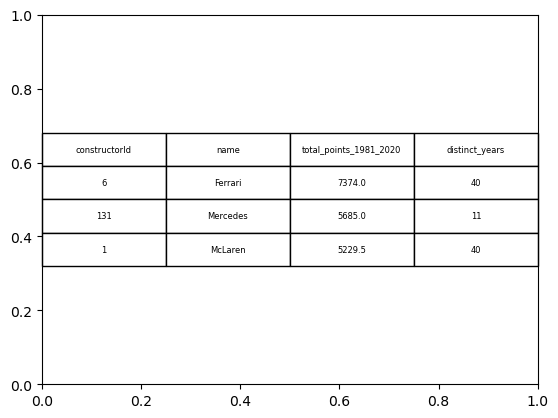

In [26]:
# Getting the names of the top 3 constructors to compute the average 
top_3_constructor_1981_2020 = constructor_points_1981_2020.iloc[0:3,:]['name']

# Getting the average total points between 1981 and 2020 for top 3 constructors 
top_3_avg_total_points_1981_2020 = constructor_points_1981_2020[constructor_points_1981_2020['name'].isin(top_3_constructor_1981_2020)]['total_points_1981_2020'].mean()

# Clean up column names and format
constructor_points_1981_2020_clean = constructor_points_1981_2020.rename(columns={
    'name': 'Constructor Name',
    'total_points_1981_2020': 'Total Points (1981-2020)',
    'distinct_years': 'Years Competed (1981-2020)'
}).drop(columns = ['constructorId'])
constructor_points_1981_2020_clean['Total Points (1981-2020)'] = constructor_points_1981_2020_clean['Total Points (1981-2020)'].round(0).astype(int)

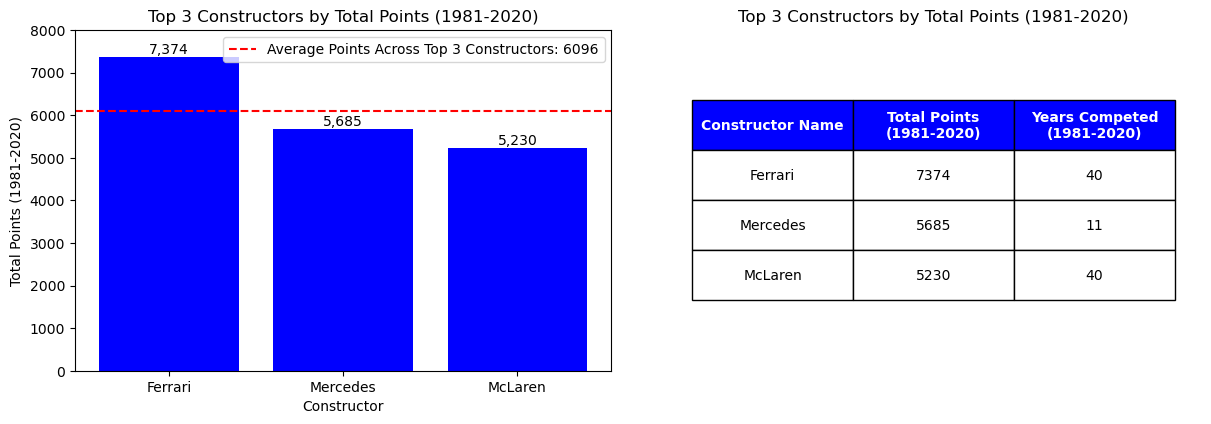

In [50]:
# Creating a plot with 1 row, 2 columns
fig, list_subfig = plt.subplots(1, 2,figsize = (12,4))

plt.tight_layout()
plt.subplots_adjust(wspace=0.1)

# First Subfigure (Bar Chart for Top 3 Constructors 1981 - 2020)
bars = list_subfig[0].bar(constructor_points_1981_2020_clean.iloc[0:3,:]['Constructor Name'], constructor_points_1981_2020_clean.iloc[0:3,:]['Total Points (1981-2020)'], color='blue')
list_subfig[0].axhline(y=top_3_avg_total_points_1981_2020, color='red', linestyle='--', label=f'Average Points Across Top 3 Constructors: {top_3_avg_total_points_1981_2020:.0f}')

for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (total points)
    list_subfig[0].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', fontsize=10)

list_subfig[0].set_xlabel('Constructor')
list_subfig[0].set_ylabel('Total Points (1981-2020)')
list_subfig[0].set_title('Top 3 Constructors by Total Points (1981-2020)')
list_subfig[0].set_ylim(0, 8000)
list_subfig[0].legend()


# Second Subfigure (Table for Top 3 Constructors 1981 - 2020)

#Formatting column headers 
constructor_points_1981_2020_clean_wrapped = ['Constructor Name', 'Total Points\n(1981-2020)', 'Years Competed\n(1981-2020)']


table = list_subfig[1].table(cellText=constructor_points_1981_2020_clean.iloc[0:3, :].values, 
                  colLabels=constructor_points_1981_2020_clean_wrapped, 
                  loc='center', cellLoc='center')

table.scale(0.9, 3)  # Adjust table size
list_subfig[1].axis('off')
list_subfig[1].set_title('Top 3 Constructors by Total Points (1981-2020)')


# Format the table
table.auto_set_font_size(False)
table.set_fontsize(10) 

# Loop through each cell and apply formatting
for (i, j), cell in table.get_celld().items():
    if i == 0:  # Header row
        cell.set_facecolor('blue')  
        cell.set_text_props(color='white', weight='bold', fontsize=10)  
    else:  
        pass
    cell.set_edgecolor('black')  





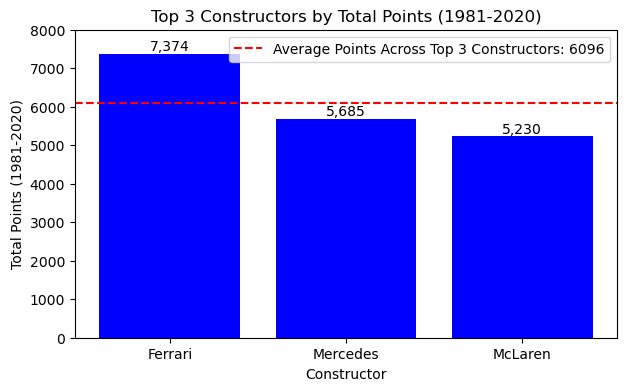

In [13]:
# Create a bar chart for the top 3 constructors
plt.figure(figsize=(7, 4))
bars = plt.bar(constructor_points_1981_2020_clean.iloc[0:3,:]['Constructor Name'], constructor_points_1981_2020_clean.iloc[0:3,:]['Total Points (1981-2020)'], color='blue')
plt.axhline(y=top_3_avg_total_points_1981_2020, color='red', linestyle='--', label=f'Average Points Across Top 3 Constructors: {top_3_avg_total_points_1981_2020:.0f}')

for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (total points)
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', fontsize=10)


plt.xlabel('Constructor')
plt.ylabel('Total Points (1981-2020)')
plt.title('Top 3 Constructors by Total Points (1981-2020)')
plt.ylim(0, 8000)
plt.legend()

# Create a table from the top 3 constructors data
table = plt.table(cellText=constructor_points_1981_2020_clean.iloc[0:3, :].values, 
                  colLabels=constructor_points_1981_2020_clean.columns, 
                  loc='center', cellLoc='center')

table.scale(1, 2)  # Adjust table size
table.axis('off')

# Display the plot
plt.show()

In [14]:
display(constructor_points_1981_2020.iloc[0:3,:])
print("Average total points across top 3 constructors between 1981 and 2020: ", int(top_3_avg_total_points_1981_2020))

,constructorId,name,total_points_1981_2020,distinct_years
0,6,Ferrari,7374.0,40
1,131,Mercedes,5685.0,11
2,1,McLaren,5229.5,40


Average total points across top 3 constructors between 1981 and 2020:  6096


**Answers:**
- Ferrari, Mercedes, and McLaren had the highest number of total points between 1981 and 2020

- Between 1981 and 2020, Ferrari got 7,374 total points, Mercedes got 5,685 total points, and McLaren got 5,230 total points (5,229.5)

- As shown in the bar chart above, both Mercedes and McLaren are below the average of the top 3 indicating that Ferrari dominates in terms of total points accumulated between 1981 and 2020, though Mercedes and McLaren are still strong performers. Also, between 1981 and 2020, mercedes only competed for 11 years while Ferrari and McLaren both competed for all 40 years. 

In [ ]:
 = pd.merge(results[['raceId', 'constructorId', 'driverId', 'positionOrder','points', 'fastestLapTime', 'rank']],
                       races[["raceId", "year"]],
                       on = "raceId",
                       how = "left")

# Pulling in constructor name from the constructors table 
results_merged = pd.merge(results_merged, constructors[['constructorId', 'name']], 
                          on = "constructorId",
                          how = "left")

# Querying for just years between 1981 and 2020, aggregating points by constructorId, and sorting by total points by constructor 
# Note: I am also getting the number of distinct years that each constructor competed during the time frame 
constructor_points_1981_2020 = (constructors_agg.query("(year >= 1981) & (year <= 2020)").groupby(["constructorId", "name"]).agg(total_points_1981_2020 = ('points_by_year','sum'), distinct_years = ('year', 'nunique')).sort_values(by = 'total_points_1981_2020', ascending = False)).reset_index()


# Created new dataframe with constructor points by year 
constructors_agg = (results_merged.groupby(["constructorId", "name", "year"]).agg(points_by_year = ('points','sum'))).reset_index()





#### Checking for missing values in rank for Ferrari between 1981 and 2020

In [ ]:
ferrari_1981_2020 = results_merged.query("(year >= 1981) & (year <= 2020) & (name == 'Ferrari')")

print("Missing value count rank: ", ferrari_1981_2020['rank'].isna().sum())

# display(ferrari_1981_2020)

#### Question b

##### Creating data frame

In [29]:
# Note: using constructors_agg from question a

# Querying for just years between 2001 and 2020, aggregating points by constructorId, and sorting by total points by constructor 
# Note: I am also getting the number of distinct years that each constructor competed during the time frame 
constructor_points_2001_2020 = (constructors_agg.query("(year >= 2001) & (year <= 2020)").groupby(["constructorId", "name"]).agg(total_points_2001_2020 = ('points_by_year','sum'), distinct_years = ('year', 'nunique')).sort_values(by = 'total_points_2001_2020', ascending = False)).reset_index()


##### Checking data frame

Note: 
- Will be using analysis from questions a and b to answer question c
- Will be using results_merged to compute question d directly


#### Question e



There are a few different metrics I want to look at to determine Ferrari's best year between 1981 and 2020:
- Total number of points accumulated in each year - directly indicates performance in each season
- Average number of points per race in each year 
- The number of races won in each year (also show relative to total races) - measure of dominance
- The number of total podium finishes in each year (also show relative to total races) - measure of consistency 
- The fastestLap for each year - could be an indicator of Ferrari's potential speed

##### Creating data frame

In [ ]:



constructors_agg = (results_merged.groupby(["constructorId", "name", "year"]).agg(total_points_by_year = ('points','sum'), avg_points_by_year = ('points', 'mean'), '')).reset_index()


In [ ]:
display(results_merged)

# IV. Results, visualizations and answers to each question

## Question a

#### Top 3 constructors by total points and average total points across top 3 contructors between 1981 and 2020

In [ ]:
# Getting the names of the top 3 constructors to compute the average 
top_3_constructor_1981_2020 = constructor_points_1981_2020.iloc[0:3,:]['name']

# Getting the average total points between 1981 and 2020 for top 3 constructors 
top_3_avg_total_points_1981_2020 = constructor_points_1981_2020[constructor_points_1981_2020['name'].isin(top_3_constructor_1981_2020)]['total_points_1981_2020'].mean()

# showing the top 3 constructors by total points between 1981 to 2020
display(constructor_points_1981_2020.iloc[0:3,:])

# printing the average total points for the top 3 constructors
print("Average total points across top 3 constructors between 1981 and 2020 ", top_3_avg_total_points_1981_2020)

#### Visualization of top 3 constructors by total points and average total points across top 3 constructors between 1981 and 2020

In [ ]:
# Create a bar chart for the top 3 constructors
plt.figure(figsize=(7, 4))
bars = plt.bar(constructor_points_1981_2020.iloc[0:3,:]['name'], constructor_points_1981_2020.iloc[0:3,:]['total_points_1981_2020'], color='blue')
plt.axhline(y=top_3_avg_total_points_1981_2020, color='red', linestyle='--', label=f'Average Points Across Top 3 Constructors: {top_3_avg_total_points_1981_2020:.0f}')

for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (total points)
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', fontsize=10)


plt.xlabel('Constructor')
plt.ylabel('Total Points (1981-2020)')
plt.title('Top 3 Constructors by Total Points (1981-2020)')
plt.ylim(0, 8000)
plt.legend()

# Display the plot
plt.show()



### Answers

| Constructor | Total Points Between 1981 and 2020 | Years Competed between 1981 and 2020 |
|-------------|------------------------------------|--------------------------------------|
| Ferrari     | 7,374                              | 40                                   |
| Mercedes    | 5,685                              | 11                                   |
| McLaren     | 5,230                              | 40                                   |

Avergage total points across top 3 constructors between 1981 and 2020 was 6,096 points




In [ ]:
# showing the top 3 constructors by total points between 1981 to 2020
display(constructor_points_1981_2020.iloc[0:3,:])

#### Ferrari, Mercedes, and McLaren had the highest number of total points between 1981 and 2020

#### Between 1981 and 2020, Ferrari got 7,374 total points, Mercedes got 5,685 total points, and McLaren got 5,230 total points (5,229.5)

#### As shown in the bar chart above, both Mercedes and McLaren are below the average of the top 3 indicating that Ferrari dominates in terms of total points accumulated between 1981 and 2020, though Mercedes and McLaren are still strong performers. Also, between 1981 and 2020, mercedes only competed for 11 years while Ferrari and McLaren both competed for all 40 years. 


## Question b

#### Top 3 constructors by total points and average total points across top 3 contructors between 2001 and 2020

In [ ]:
# Getting the names of the top 3 constructors to compute the average 
top_3_constructor_2001_2020 = constructor_points_2001_2020.iloc[0:3,:]['name']

# Getting the average total points between 2001 and 2020 for top 3 constructors 
top_3_avg_total_points_2001_2020 = constructor_points_2001_2020[constructor_points_2001_2020['name'].isin(top_3_constructor_2001_2020)]['total_points_2001_2020'].mean()

# showing the top 3 constructors by total points between 2001 to 2020
display(constructor_points_2001_2020.iloc[0:3,:])

# printing the average total points for the top 3 constructors
print("Average total points across top 3 constructors between 2001 and 2020 ", top_3_avg_total_points_2001_2020)

#### Visualization of top 3 constructors by total points and average total points across top 3 constructors between 2001 and 2020

In [ ]:
# Create a bar chart for the top 3 constructors

plt.figure(figsize=(7, 4))
bars = plt.bar(constructor_points_2001_2020.iloc[0:3,:]['name'], constructor_points_2001_2020.iloc[0:3,:]['total_points_2001_2020'], color='blue')
plt.axhline(y=top_3_avg_total_points_2001_2020, color='red', linestyle='--', label=f'Average Points Across Top 3 Constructors: {top_3_avg_total_points_2001_2020:.0f}')

for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (total points)
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', fontsize=10)

plt.ylim(0, 7000)
plt.xlabel('Constructor')
plt.ylabel('Total Points (2001-2020)')
plt.title('Top 3 Constructors by Total Points (2001-2020)')
plt.legend() 

# Display the plot
plt.show()

### Answers
| Constructor | Total Points Between 2001 and 2020 | Years Competed Between 2001 and 2020 |
|-------------|------------------------------------|--------------------------------------|
| Ferrari     | 5,862                              | 20                                   |
| Mercedes    | 5,685                              | 11                                   |
| Red Bull    | 5,044                              | 16                                   |

Avergage total points across top 3 constructors between 2001 and 2020 was 5,530 points

#### Ferrari, Mercedes, and Red Bull had the highest number of total points between 2001 and 2020

#### Between 2001 and 2020, Ferrari got 5,862 total points, Mercedes got 5,685 total points, and Red Bull got 5,004 total points; note that Mercedes has the same number of total points between 1981 and 2020, and between 2001 and 2020 because within those time periods, they only started racing from 2010 onwards.

#### As shown in the bar chart above, both Ferrari and Mercedes are above the average total points for the top 3 indicating the close competition between them in this period. Red bull is slightly below average but is still a strong competitor. Ferrari has also been racing for more years during this time period than the other constructors. 


## Question c

#### Comparing tables and bar charts from questions a and b 

In [ ]:
# Creating a plot with 1 row, 2 columns
fig, list_subfig = plt.subplots(1, 2,figsize = (12,4))


plt.tight_layout()
plt.subplots_adjust(wspace=0.4)
# First Subfigure (Bar Chart for Top 3 Constructors 1981 - 2020)
bars = list_subfig[0].bar(constructor_points_1981_2020.iloc[0:3,:]['name'], constructor_points_1981_2020.iloc[0:3,:]['total_points_1981_2020'], color='blue')
list_subfig[0].axhline(y=top_3_avg_total_points_1981_2020, color='red', linestyle='--', label=f'Avg Points Across Top 3: {top_3_avg_total_points_1981_2020:.0f}')

for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (total points)
    list_subfig[0].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', fontsize=10)

list_subfig[0].set_xlabel('Constructor')
list_subfig[0].set_ylabel('Total Points (1981-2020)')
list_subfig[0].set_title('Top 3 Constructors by Total Points (1981-2020)')
list_subfig[0].set_ylim(0, 8000)
list_subfig[0].legend()



# Second Subfigure (Bar Chart for Top 3 Constructors 2021 - 2020)
bars = list_subfig[1].bar(constructor_points_2001_2020.iloc[0:3,:]['name'], constructor_points_2001_2020.iloc[0:3,:]['total_points_2001_2020'], color='blue')
list_subfig[1].axhline(y=top_3_avg_total_points_2001_2020, color='red', linestyle='--', label=f'Avg Points Across Top 3: {top_3_avg_total_points_2001_2020:.0f}')

for bar in bars:
    yval = bar.get_height()  # Get the height of the bar (total points)
    list_subfig[1].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', fontsize=10)

list_subfig[1].set_xlabel('Constructor')
list_subfig[1].set_ylabel('Total Points (2001-2020)')
list_subfig[1].set_title('Top 3 Constructors by Total Points (2001-2020)')
list_subfig[1].set_ylim(0, 8000)
list_subfig[1].legend()


# Display the plot
plt.show()

### Answers

McLaren dropped out of the top three during the 2001-2020 time period, while Red Bull entered the top 3 taking 3rd place. 

Ferrari remained the top constructor between both time periods, though they appear to be less dominant in the 2001-2020 time period.

Mercedes' total points remained the same between both time periods because they only started competing in 2010, which makes sense why the gap of total points from Ferrari decreased in the 2001-2020 time period since the number of years competing between the two constructors are becoming more similar. 

## Question d

In [ ]:

# Querying for just years between 1981 and 2020, aggregating points by constructorId, and sorting by total points by constructor 
# Note: I am also getting the number of distinct years that each constructor competed during the time frame 
drivers_ferrari_1981_2020 = (results_merged.query("(year >= 1981) & (year <= 2020) & (name == 'Ferrari')"))['fullName'].nunique()

print("Unique Ferrari drivers between 1981 and 2020: ", drivers_ferrari_1981_2020)
                                                   



### Answers

There were 25 different drivers for Ferrari between 1981 and 2020